# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [1]:
### Student Name: PAOLA MENDOZA RAMIREZ

Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [ ]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp
import scipy.stats as stats

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(8, 4)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [13]:
genes=pd.read_csv("~/code_github/datasets/genes_id.txt", header=None)
subtype=pd.read_csv("~/code_github/datasets/patient_subtype.txt", header=None, names=["clinical_subtypes"])
expression=pd.read_csv("~/code_github/datasets/patient_expression.txt", header=None, sep="\s+")


print("Shape of genes df:", genes.shape)
print("Shape of subtype df:", subtype.shape)
print("Shape of expression df:", expression.shape)


Shape of genes df: (47, 1)
Shape of subtype df: (645, 1)
Shape of expression df: (645, 47)


### How many patient are you considering? [1 pt]

In [14]:
num_pt=subtype.shape[0]
print("Number of patients:", num_pt)

Number of patients: 645


### How many genes are you considering? [1 pt]

In [15]:
num_genes=genes.shape[0]
print("Number of genes:", num_genes)

Number of genes: 47


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [7]:
gene_ids = genes.T.iloc[0]
expression.columns = gene_ids
combined_df = pd.concat([ expression, subtype], axis=1)
combined_df.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,clinical_subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [8]:
print("Number of subtypes:", combined_df.loc[:, "clinical_subtypes"].nunique())

Number of subtypes: 5


### How many patients are associtated to each subtype? [2 pts]

In [9]:
print("Number of subtypes:", combined_df.loc[:, "clinical_subtypes"].value_counts())

Number of subtypes: clinical_subtypes
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64


### Generate a graph showing the distribution of the average expression of each gene [5 pts]

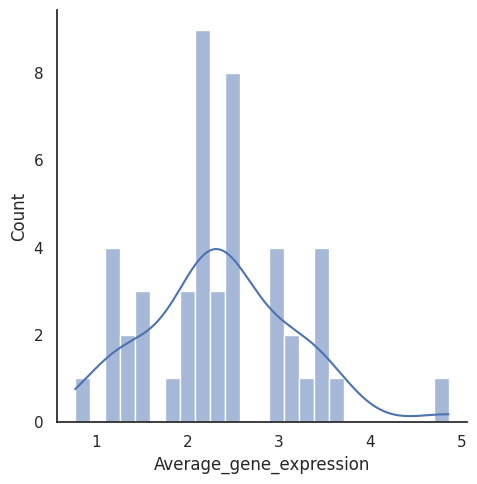

In [16]:
df_avg=combined_df.copy()
genes_tags=genes.copy()
df_avg=df_avg.drop(["clinical_subtypes"], axis=1)
average_exp=df_avg.mean()
average_df=pd.DataFrame(data=average_exp, index=None, columns=["Avg_exp"])

a=average_df.reset_index(drop=True)
g=genes_tags.reset_index(drop=True)

average_df=pd.DataFrame.join(g, a)
average_df.head()
average_df.columns=["gene_ID", "Average_gene_expression"]
average_df.head()

avg_plot = sns.displot(average_df["Average_gene_expression"], kde=True, bins=25)
sns.despine()

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [17]:
df_std=combined_df.copy()
df_std=df_std.drop(["clinical_subtypes"], axis=1)
std_dv=df_std.std()
top2=std_dv.sort_values(ascending=False).head(2)
print("The two genes with the largest standard deviation for all patient are:", top2)

The two genes with the largest standard deviation for all patient are: ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64


### Compare the expression of these two genes: are they corrolated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

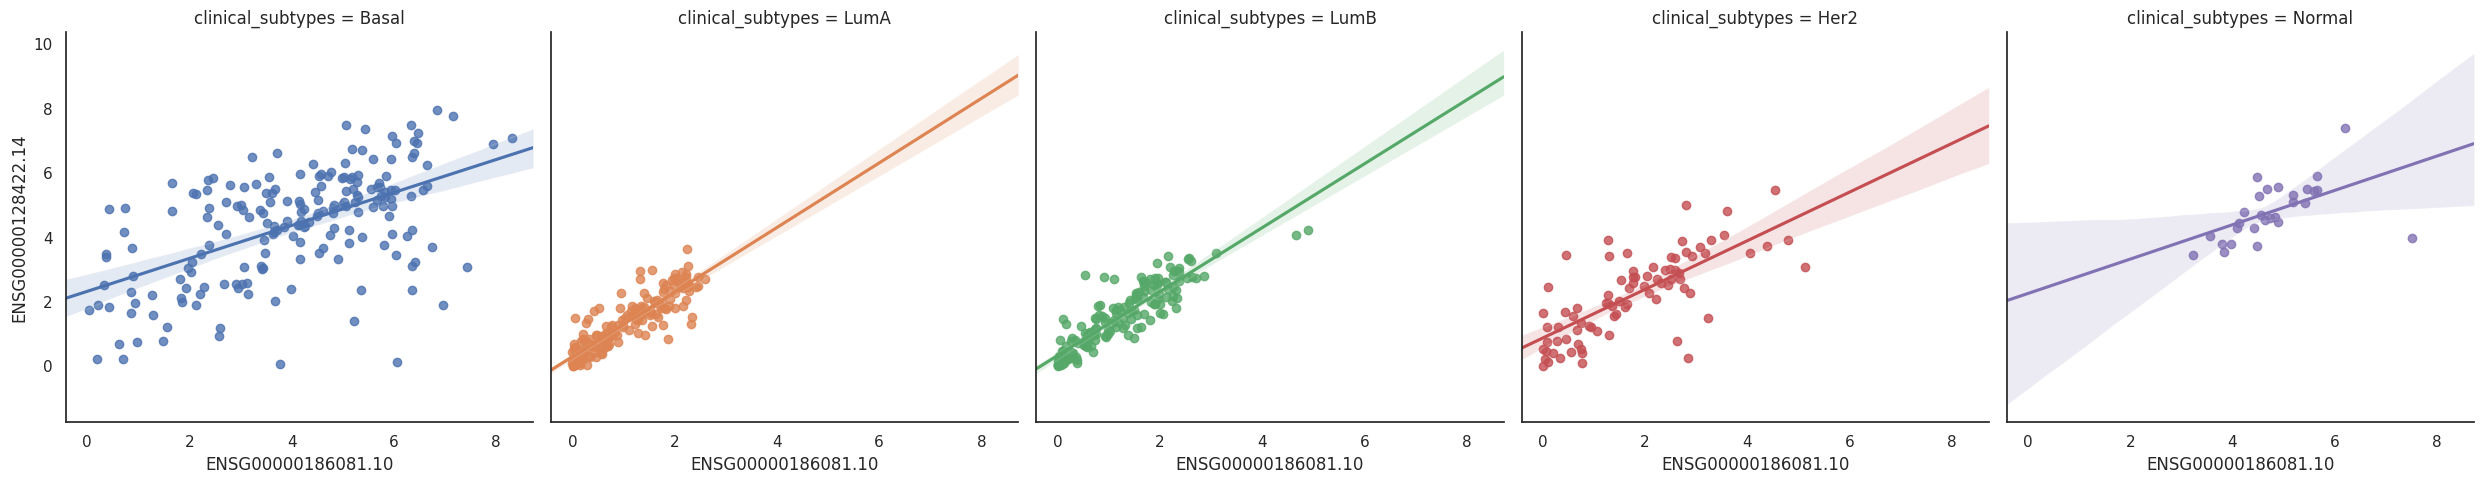

In [32]:
#Make a figure showing the correlation between the two genes by clinical subtypes,
plot1=sns.lmplot(data=combined_df, x="ENSG00000186081.10", y="ENSG00000128422.14", hue="clinical_subtypes", truncate=False, col="clinical_subtypes")
plot1



In [52]:
#Calculate a correlation coefficient for each comparison and,
#Global

reg=stats.linregress(combined_df["ENSG00000186081.10"], combined_df["ENSG00000128422.14"], alternative="two-sided")

df2=combined_df.copy()
#Basal
Basal=df2.loc[df2.clinical_subtypes == "Basal"]
reg_basal=stats.linregress(Basal["ENSG00000186081.10"], Basal["ENSG00000128422.14"], alternative="two-sided")

#Normal

Normal=df2.loc[df2.clinical_subtypes == "Normal"]
reg_normal=stats.linregress(Normal["ENSG00000186081.10"], Normal["ENSG00000128422.14"], alternative="two-sided")

#LumA

LumA=df2.loc[df2.clinical_subtypes == "LumA"]
reg_luma=stats.linregress(LumA["ENSG00000186081.10"], LumA["ENSG00000128422.14"], alternative="two-sided")

#LumB

LumB=df2.loc[df2.clinical_subtypes == "LumB"]
reg_lumb=stats.linregress(LumB["ENSG00000186081.10"], LumB["ENSG00000128422.14"], alternative="two-sided")


#Her2

Her2=df2.loc[df2.clinical_subtypes == "Her2"]
reg_her2=stats.linregress(Her2["ENSG00000186081.10"], Her2["ENSG00000128422.14"], alternative="two-sided")


print(" Global Pearson correlation: ", reg.rvalue)
print(" Basal Pearson correlation: ", reg_basal.rvalue)
print(" Normal Pearson correlation: ", reg_normal.rvalue)
print(" LumA Pearson correlation: ", reg_luma.rvalue)
print(" LumB Pearson correlation: ", reg_lumb.rvalue)
print(" Her2 Pearson correlation: ", reg_her2.rvalue)
print("Interpretation:Overall, the Pearson Coefficients, global and by clinical subtypes, suggest a positive linear relationship between the two genes")

 Global Pearson correlation:  0.8521665313702186
 Basal Pearson correlation:  0.5544196989003722
 Normal Pearson correlation:  0.5350817650187477
 LumA Pearson correlation:  0.8914287604819622
 LumB Pearson correlation:  0.8974230320693612
 Her2 Pearson correlation:  0.7362528192401565
Interpretation:Overall, the Pearson Coefficients, global and by clinical subtypes, suggest a positive linear relationship between the two genes


## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [21]:
df_pca=combined_df.copy()
df_pca=df_pca.drop(["clinical_subtypes"], axis=1)
df_pca.head()
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(df_pca)
subset_scaled = scaler.transform(df_pca)
pca = sklearn.decomposition.PCA(n_components=25)
pca.fit(subset_scaled)

PCA(n_components=25)

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [22]:
percentage_var=(pca.explained_variance_ratio_[0:2].sum())*100

print("Variance percentage of the dataset explained by the two first components=", percentage_var, "%")

Variance percentage of the dataset explained by the two first components= 57.54637194875689 %


### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [23]:
pca_reduce = pca.fit_transform(subset_scaled)
pca_reduce
### Make a dataframe and add the label column
data_reduce = pd.DataFrame(pca_reduce)
data_reduce.loc[:, "clinical_subtypes"] = combined_df.clinical_subtypes

data_reduce.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,clinical_subtypes
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,-1.875858,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,0.501419,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,-0.397783,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.469685,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,-0.835880,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal


### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

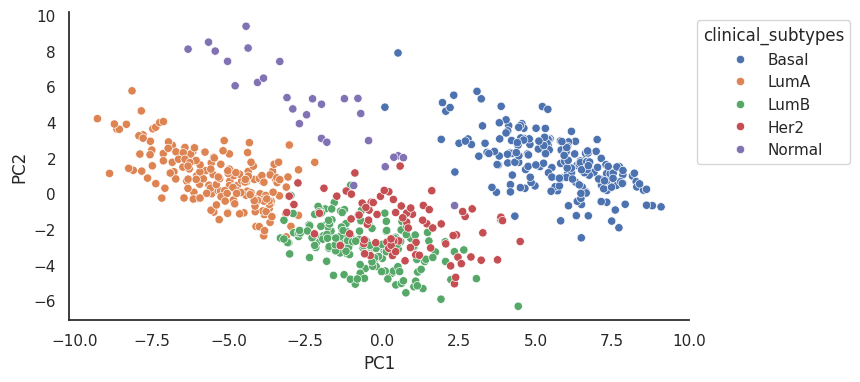

In [24]:
p = sns.scatterplot(data_reduce, x=0, y=1, hue="clinical_subtypes")
p.set_xlabel("PC1")
p.set_ylabel("PC2")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

### Apply the K-means algorithme to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

In [25]:
subset_KM=data_reduce.iloc[:, :25] 
subset_KM.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,1.995742,-1.875858,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,-0.585100,0.501419,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,1.242659,-0.397783,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,0.346363,-0.469685,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,-0.904561,-0.835880,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466


In [26]:
kmean_algo=sklearn.cluster.KMeans(n_clusters=5, n_init="auto")
kmeans_subset=kmean_algo.fit(subset_KM)
print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T

[[-2.33358894e+00  5.44543614e+00  8.48178936e-01  5.96423098e-01
   5.80237393e-01  5.97783995e-01 -9.82148492e-01  9.27235137e-02
   1.17492006e-01  4.25931901e-01 -7.81065009e-01  1.15413149e-01
   2.57292217e-01 -1.26432275e-01 -2.41803426e-02  4.15658514e-02
   1.22095274e-01  1.31268263e-01  1.73742719e-02  2.88890447e-01
   4.55178053e-02  1.19068440e-02  1.79873161e-01 -1.31064831e-01
  -8.66095598e-02]
 [ 5.51735889e-01 -2.00205797e+00  3.37324941e+00 -4.01599333e-01
  -1.28634930e-01  2.85515473e-01 -4.44340253e-02  9.03643787e-02
  -1.07221791e-01  7.28450352e-02 -2.07302091e-02 -4.56908494e-02
   2.77137703e-02  8.05551294e-02  5.28564268e-02  3.48777368e-02
   4.52339905e-02  6.01606053e-02  3.42966913e-02 -1.00152522e-01
   3.04300372e-02  5.14383329e-02 -1.23357812e-02  1.11220524e-02
  -3.02263121e-02]
 [ 5.70217595e+00  1.66194769e+00 -4.44929014e-01 -1.03263856e-01
  -9.14467729e-02 -3.08330284e-03  1.05793135e-01 -4.57380209e-02
  -6.72960598e-02 -9.80461375e-02  1.1

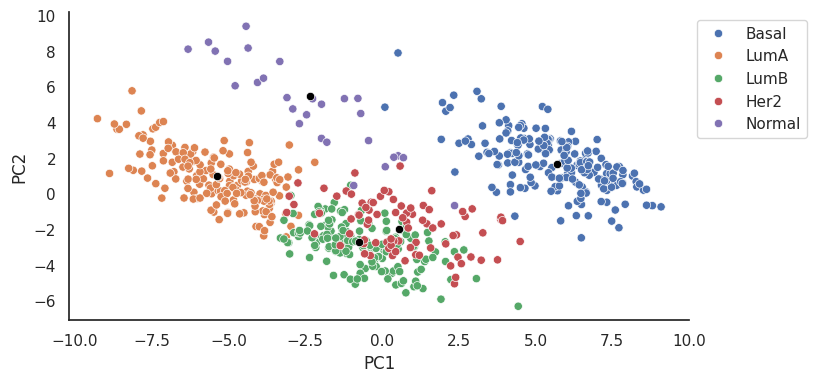

In [27]:
p1 = sns.scatterplot(data_reduce, x=0, y=1, hue="clinical_subtypes")
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[1], color="black")
p1.set_xlabel("PC1")
p1.set_ylabel("PC2")
sns.move_legend(p1, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [28]:
kmeans_subset.labels_
subset_KM.loc[:, "clinical_subtypes"]=combined_df.clinical_subtypes
subset_KM.loc[:, "kmeans_labels"]=kmeans_subset.labels_
subset_KM.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20", "PC21","PC22","PC23","PC24", "PC25"] + ['clinical_subtypes', 'kmeans_labels']
subset_KM

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,clinical_subtypes,kmeans_labels
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal,2
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal,2
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal,2
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal,2
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-4.054981,6.227401,1.458602,1.421975,1.311305,1.605043,-0.321331,-0.365449,0.442594,1.099888,...,0.467726,0.048400,0.467071,0.148066,0.109411,0.705191,-0.122287,-0.003568,Normal,0
641,0.697819,2.007934,1.387969,2.302343,1.055503,-0.011588,-0.451215,0.350735,0.337477,1.336361,...,0.210178,0.203870,0.415196,0.582681,0.238052,0.010782,0.232744,0.038406,Normal,0
642,-3.859061,6.468153,2.007192,1.025694,0.900630,1.443919,-0.293791,0.488818,0.750596,-0.254519,...,0.409772,0.715591,0.827275,0.289570,-0.221828,0.277182,-0.509931,-0.227591,Normal,0
643,-2.690803,3.915308,4.485345,0.093599,0.497658,-1.334994,-1.062247,1.059165,0.787667,0.645511,...,-0.253376,-0.159591,0.239230,0.206479,0.580015,0.020920,-0.641803,0.233898,Normal,0


### What value of k did you use and why? [2 pt]

In [29]:
print("I used k=5 because there are 5 distinct clinical subtypes in the dataset: Normal, Her2, LumB, LumA, and, Basal")

I used k=5 because there are 5 distinct clinical subtypes in the dataset: Normal, Her2, LumB, LumA, and, Basal


In [33]:
#Check this with elbow method
kmeans_subset.inertia_

12446.167049688956

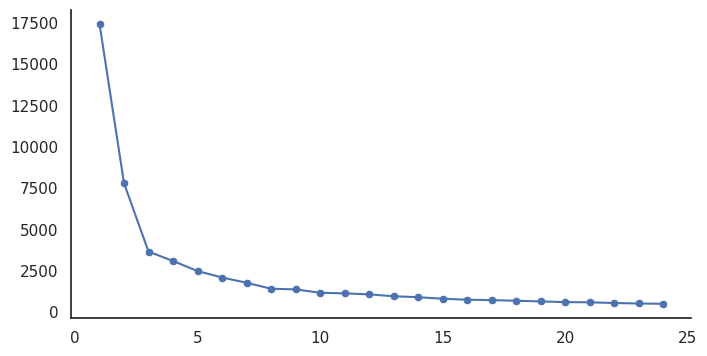

In [51]:

inertia_list = []

X = subset_KM.loc[:, ["PC1", "PC2"]]

### Create for loop for K from 1 to 10
for k in range(1, 25) :
    kmean = sklearn.cluster.KMeans(n_clusters=k, n_init="auto")
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
sns.lineplot(x=np.arange(1, 25), y=inertia_list)
sns.scatterplot(x=np.arange(1, 25), y=inertia_list)
sns.despine()

#print("we can conclude that for the dataset, 5 is an acceptable value for the number of clusters? not sure because the elbow is before 5")#ask

### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**

Interpretation: The clusters with the k-means value do not work the same for all the clinical subtypes. For the Basal and LumA groups we observe better defined clusters compared to the LumB,  Her2 and Normal where the clusters overlap. Hence further analyisis would need to be made to improve clustering or determine whether these groups share biological similarities.


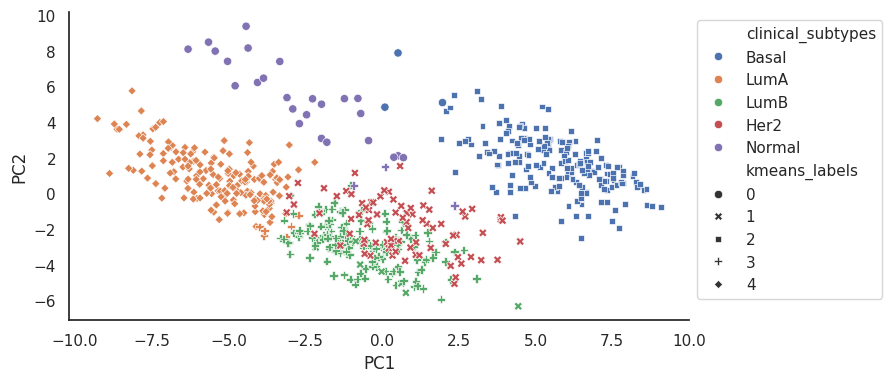

In [30]:
p = sns.scatterplot(subset_KM, x="PC1", y="PC2", hue="clinical_subtypes", style="kmeans_labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()
print("Interpretation: The clusters with the k-means value do not work the same for all the clinical subtypes. For the Basal and LumA groups we observe better defined clusters compared to the LumB,  Her2 and Normal where the clusters overlap. Hence further analyisis would need to be made to improve clustering or determine whether these groups share biological similarities.")